<a href="https://colab.research.google.com/github/Suhaditya-C/LeetCode_solutions/blob/main/778_Swim_in_Rising_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 778. Swim in Rising Water

You are given an n x n integer matrix grid where each value grid[i][j] represents the elevation at that point (i, j).

It starts raining, and water gradually rises over time. At time t, the water level is t, meaning any cell with elevation less than equal to t is submerged or reachable.

You can swim from a square to another 4-directionally adjacent square if and only if the elevation of both squares individually are at most t. You can swim infinite distances in zero time. Of course, you must stay within the boundaries of the grid during your swim.

Return the minimum time until you can reach the bottom right square (n - 1, n - 1) if you start at the top left square (0, 0).



Example 1:

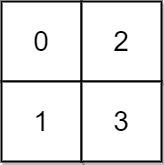

Input: grid = [[0,2],[1,3]]
Output: 3
Explanation:
At time 0, you are in grid location (0, 0).
You cannot go anywhere else because 4-directionally adjacent neighbors have a higher elevation than t = 0.
You cannot reach point (1, 1) until time 3.
When the depth of water is 3, we can swim anywhere inside the grid.
Example 2:

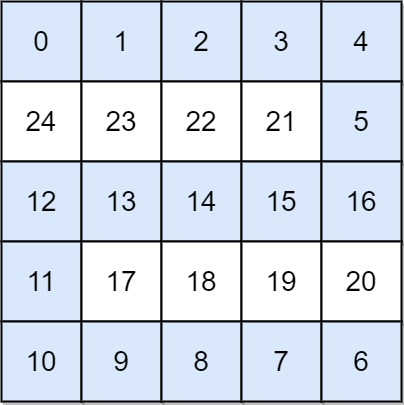

Input: grid = [[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]]
Output: 16
Explanation: The final route is shown.
We need to wait until time 16 so that (0, 0) and (4, 4) are connected.


Constraints:

n == grid.length
n == grid[i].length
1 <= n <= 50
0 <= grid[i][j] < n2
Each value grid[i][j] is unique.

## Solution: Using Dijkstra's algo for shortest path (shortest time in this context)

In [9]:
import heapq

In [11]:
grid = [[0,1,2,3,4],[24,23,22,21,5],[12,13,14,15,16],[11,17,18,19,20],[10,9,8,7,6]]
dir=[(0,1),(0,-1),(1,0),(-1,0)]
pq=[]
heapq.heappush(pq,(grid[0][0],0,0))
grid[0][0]=-1 #Mark as visited
res=0
while pq:
    max_t,row,col= heapq.heappop(pq) #priority queue ensures that the cell with min. time taken to reach is explored first

    if row==len(grid)-1 and col==len(grid[0])-1:
        res=max_t #Once bottom right cell is reached, return the result
        break

    for d in dir: #Explore all directions
        next_row=row+d[0]
        next_col=col+d[1]
        if 0<=next_row<len(grid) and 0<=next_col<len(grid[0]) and grid[next_row][next_col]!=-1: #If within bounds and cell not visited
            new_t=max(grid[next_row][next_col],max_t) #new_t is the time taken to reach that cell
            heapq.heappush(pq,(new_t,next_row,next_col))
            grid[next_row][next_col]=-1 #Mark as visited
res

16